In [ ]:
"""
통합된 파일 불러들이기
 - 변수명 : df_bus_card_tot
"""

In [1]:
import pandas as pd

In [2]:
file_path = "./02_data_통합본/df_bus_card_tot.csv"
df_bus_card_tot = pd.read_csv(file_path)

df_bus_card_tot.info()
df_bus_card_tot.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842608 entries, 0 to 842607
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   승차시각        842608 non-null  object 
 1   하차시각        842608 non-null  object 
 2   승객연령        841683 non-null  object 
 3   환승여부        842608 non-null  object 
 4   추가운임여부      842608 non-null  object 
 5   승차정류장       842608 non-null  object 
 6   하차정류장       842608 non-null  object 
 7   버스내체류시간(분)  842608 non-null  float64
 8   기준년도        842608 non-null  int64  
 9   기준월         842608 non-null  int64  
 10  기준일         842608 non-null  int64  
 11  기준시간        842608 non-null  int64  
 12  기준시간(분)     842608 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 83.6+ MB


,승차시각,하차시각,승객연령,환승여부,추가운임여부,승차정류장,하차정류장,버스내체류시간(분),기준년도,기준월,기준일,기준시간,기준시간(분)
0,2020-01-02 05:10:49,2020-01-02 05:18:44,일반,N,N,양덕차고지,동부초등학교,7.92,2020,1,2,5,10


### 시각화 라이브러리

In [3]:
### 기본 시각화 라이브러리
import matplotlib
import matplotlib.pyplot as plt

### 기본 시각화보다 고급스러운 스타일의 시각화 라이브러리
import seaborn as sns

### 시각화를 위한 font 지정(한글깨짐 방지)
from matplotlib import font_manager, rc

### 사용자의 OS(운영체제) 확인 가능한 라이브러리
import platform

### 한글 font 설정
plt.rc("font", family = "Malgun Gothic")

### 시각화 시 마이너스(-, 음수) 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

In [ ]:
### [버스 이용량 분석]
# 1. 기준월 및 기준일자별 버스 이용량 분석 비교
# 2. 기준일 및 기준시간별 버스 이용량 분석 비교
# 3. 기준시간 및 기준분별 버스 이용량 분석 비교

### [버스 내 체류시간]
# 1. 기준일 및 기준시간대별 버스내 체류시간(분) 분석 비교
# 2. 기준시간대별 승객구분별 버스내 체류시간(분) 분석 비교
# 3. 기준시간대별 승객구분별 빈도분석 비교

### [승하차정류장별 버스내 체류시간]
# - 승하차정류장 구간별 버스내 체류시간(분)이 가장 높은 상위 30건 분석 비교

### [버스 이용량 분석]

In [6]:
### 1. 기준월 및 기준일자별 버스 이용량 분석 비교
# - 기준월 및 기준일자별 버스 이용량 count 집계하기
df_pivot = df_bus_card_tot.pivot_table(values = "승객연령",
                                        index  = "기준월",
                                        columns= "기준일",
                                        aggfunc= "count")
df_pivot

기준일,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
기준월,,,,,,,,,,,,,,,,,,,,,
1,9365.0,16164.0,16590.0,12530.0,9515.0,15474.0,12981.0,15785.0,16760.0,17495.0,...,17229.0,17399.0,9112.0,5923.0,7770.0,5468.0,14464.0,16034.0,15868.0,16186.0
2,11801.0,8523.0,15830.0,15488.0,14902.0,14376.0,15700.0,11358.0,8316.0,15582.0,...,5654.0,2898.0,5932.0,4469.0,5344.0,5417.0,5488.0,3757.0,NaN,NaN
3,2399.0,6538.0,5691.0,5976.0,5828.0,6150.0,4111.0,2826.0,6879.0,5336.0,...,NaN,NaN,NaN,131.0,2889.0,4976.0,3868.0,1241.0,5143.0,2487.0


In [8]:
### 집계 데이터에서 NaN 데이터를 0으로 -> 결측치 처리하기
df_pivot = df_pivot.fillna(0)
df_pivot

기준일,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
기준월,,,,,,,,,,,,,,,,,,,,,
1,9365.0,16164.0,16590.0,12530.0,9515.0,15474.0,12981.0,15785.0,16760.0,17495.0,...,17229.0,17399.0,9112.0,5923.0,7770.0,5468.0,14464.0,16034.0,15868.0,16186.0
2,11801.0,8523.0,15830.0,15488.0,14902.0,14376.0,15700.0,11358.0,8316.0,15582.0,...,5654.0,2898.0,5932.0,4469.0,5344.0,5417.0,5488.0,3757.0,0.0,0.0
3,2399.0,6538.0,5691.0,5976.0,5828.0,6150.0,4111.0,2826.0,6879.0,5336.0,...,0.0,0.0,0.0,131.0,2889.0,4976.0,3868.0,1241.0,5143.0,2487.0


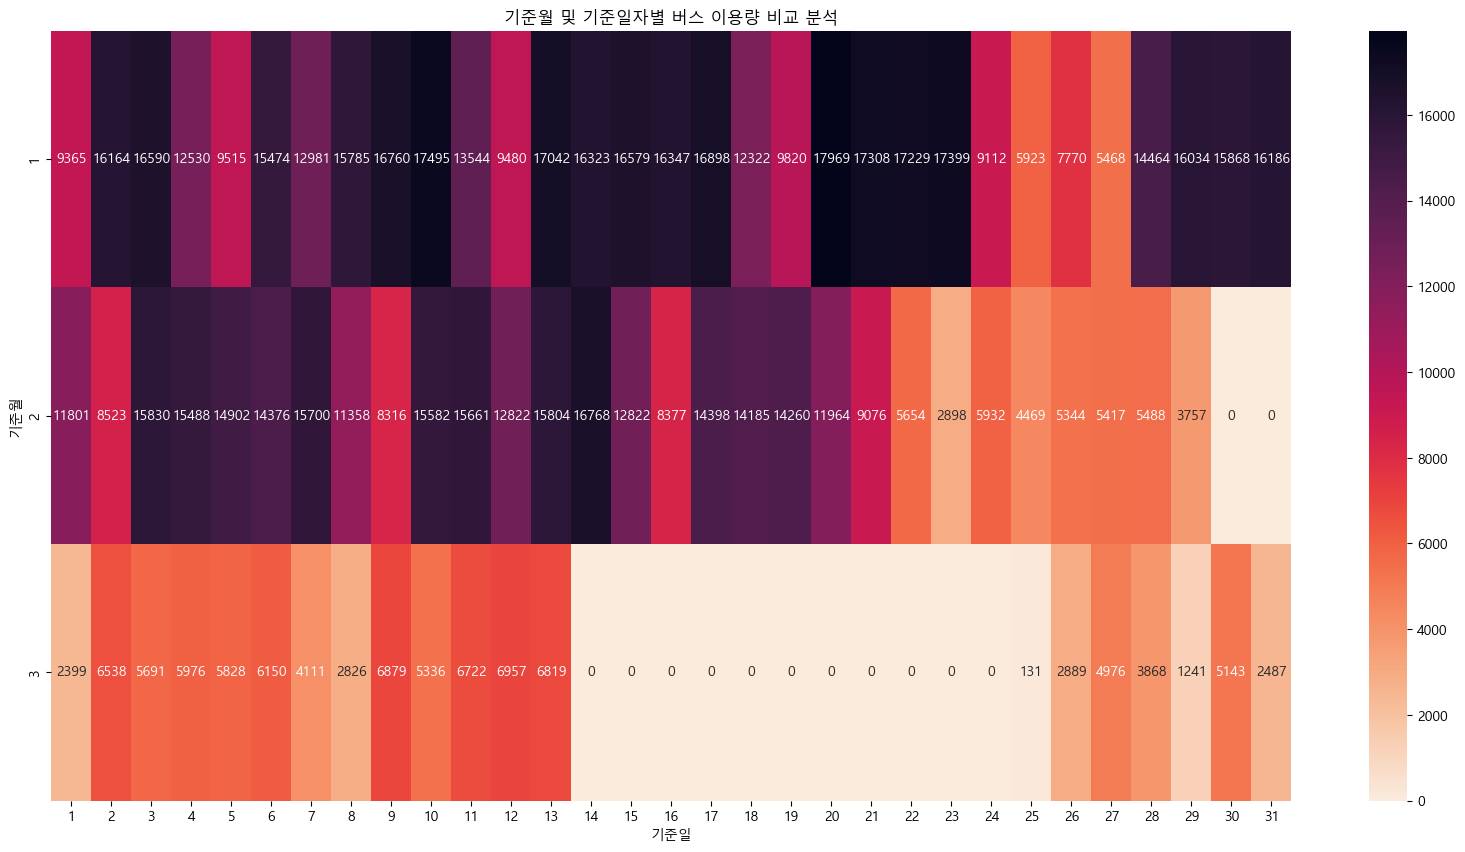

In [12]:
### 히트맵 그래프로 시각화 하기
# - 히트맵 : 데이터 3개가 필요함.. 보통 피봇테이블로 데이터 집계 후 사용하면 편함

# 그래프 사이즈 정의하기(너비, 높이)
plt.figure(figsize=(20, 10))

# 그래프 대제목 넣기
plt.title("기준월 및 기준일자별 버스 이용량 비교 분석")

# 히트맵 그리기 : seaborn 라이브러리에 있습니다.
# - annot : 박스 안에 숫자 보여줄지(True)/말지(False) 정의
# - fmt : 박수 안에 숫자의 길이 정의(소숫점이 있는경우 자릿수 지정)
# - cmap : 색상맵(색상지도), 즉 어떤 색상 그룹을 사용할지 지정
#          (인터넷 상에 매우 많은 색상맵이 존재함)
sns.heatmap(df_pivot, annot=True, fmt=".0f", cmap="rocket_r")

# 그래프 보여주기(그래프 실행)
plt.show()

In [ ]:
### [숙제]
# - 위 코드를 이용해서...
# - 기준일 및 기준시간, 기준시간 및 기준시간(분) 각각에 대한 히트맵을 시각화 할 수 있는
# - 함수로 정의해서 사용하기...
# - 함수 이름 : heatmapView

### 기준일 및 기준시간대별 버스 내 체류시간(분) 비교 분석

In [15]:
df_pivot = df_bus_card_tot.pivot_table(values   ="버스내체류시간(분)",
                                        index   ="기준일",
                                        columns ="기준시간",
                                         aggfunc="mean")
df_pivot

기준시간,0,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
기준일,,,,,,,,,,,,,,,,,,,,
1,NaN,20.185488,15.065700,15.542460,17.735285,16.823798,17.770270,17.940174,17.522978,18.783028,18.642399,18.748500,17.976289,17.076688,15.824397,14.739991,14.340558,12.968573,12.927661,10.141241
2,NaN,15.265850,14.806974,15.979958,16.862839,16.617578,16.623285,16.619018,16.783098,17.119194,17.020257,16.526872,16.687667,17.859095,16.110768,14.766509,14.066535,13.385391,11.963045,9.550331
3,NaN,16.207616,16.102444,16.932923,17.779202,17.446342,17.217125,17.451306,17.225996,17.306934,17.317991,16.733738,15.876396,17.920374,16.874102,14.690231,13.772204,13.148286,12.715960,10.486348
4,NaN,16.856873,15.818779,16.329389,17.746591,17.578763,17.172979,17.223062,17.060355,17.364541,17.239988,17.255308,16.513688,17.664968,16.110601,15.407928,14.028749,13.337576,12.701980,10.312930
5,NaN,15.020792,15.184869,16.311103,16.981384,16.968996,16.862902,17.016486,16.790928,17.006869,16.596275,16.545953,16.024344,17.280948,16.423624,14.759871,13.949883,12.823621,12.274755,10.590374
6,NaN,15.837279,15.621500,17.124198,17.427161,17.365252,16.863744,16.746780,16.725645,17.474210,17.305755,16.866636,16.390833,18.139636,16.341516,14.465326,14.197360,12.977658,12.108373,9.706781
7,NaN,16.690043,16.107964,16.740012,16.964828,16.890958,17.141667,17.462651,16.990000,17.229292,17.255265,16.335514,16.064350,17.369103,16.122753,14.418732,13.542116,13.354229,13.003338,9.817887
8,NaN,16.505822,14.502873,16.866954,16.898657,17.260075,17.513306,17.314172,17.258112,17.255776,17.269801,16.812588,17.077971,17.741996,16.342676,14.700422,13.597763,13.382963,12.256994,9.280789
9,NaN,16.434894,16.030709,16.606998,16.923098,17.546969,17.367429,16.930546,17.193934,16.860544,17.363075,17.003951,16.776502,18.089904,16.345227,14.426300,14.180609,13.247607,12.588429,10.177771


In [16]:
### NaN 데이터를 0으로 결측치 처리하기
df_pivot = df_pivot.fillna(0)
df_pivot

기준시간,0,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
기준일,,,,,,,,,,,,,,,,,,,,
1,0.00,20.185488,15.065700,15.542460,17.735285,16.823798,17.770270,17.940174,17.522978,18.783028,18.642399,18.748500,17.976289,17.076688,15.824397,14.739991,14.340558,12.968573,12.927661,10.141241
2,0.00,15.265850,14.806974,15.979958,16.862839,16.617578,16.623285,16.619018,16.783098,17.119194,17.020257,16.526872,16.687667,17.859095,16.110768,14.766509,14.066535,13.385391,11.963045,9.550331
3,0.00,16.207616,16.102444,16.932923,17.779202,17.446342,17.217125,17.451306,17.225996,17.306934,17.317991,16.733738,15.876396,17.920374,16.874102,14.690231,13.772204,13.148286,12.715960,10.486348
4,0.00,16.856873,15.818779,16.329389,17.746591,17.578763,17.172979,17.223062,17.060355,17.364541,17.239988,17.255308,16.513688,17.664968,16.110601,15.407928,14.028749,13.337576,12.701980,10.312930
5,0.00,15.020792,15.184869,16.311103,16.981384,16.968996,16.862902,17.016486,16.790928,17.006869,16.596275,16.545953,16.024344,17.280948,16.423624,14.759871,13.949883,12.823621,12.274755,10.590374
6,0.00,15.837279,15.621500,17.124198,17.427161,17.365252,16.863744,16.746780,16.725645,17.474210,17.305755,16.866636,16.390833,18.139636,16.341516,14.465326,14.197360,12.977658,12.108373,9.706781
7,0.00,16.690043,16.107964,16.740012,16.964828,16.890958,17.141667,17.462651,16.990000,17.229292,17.255265,16.335514,16.064350,17.369103,16.122753,14.418732,13.542116,13.354229,13.003338,9.817887
8,0.00,16.505822,14.502873,16.866954,16.898657,17.260075,17.513306,17.314172,17.258112,17.255776,17.269801,16.812588,17.077971,17.741996,16.342676,14.700422,13.597763,13.382963,12.256994,9.280789
9,0.00,16.434894,16.030709,16.606998,16.923098,17.546969,17.367429,16.930546,17.193934,16.860544,17.363075,17.003951,16.776502,18.089904,16.345227,14.426300,14.180609,13.247607,12.588429,10.177771


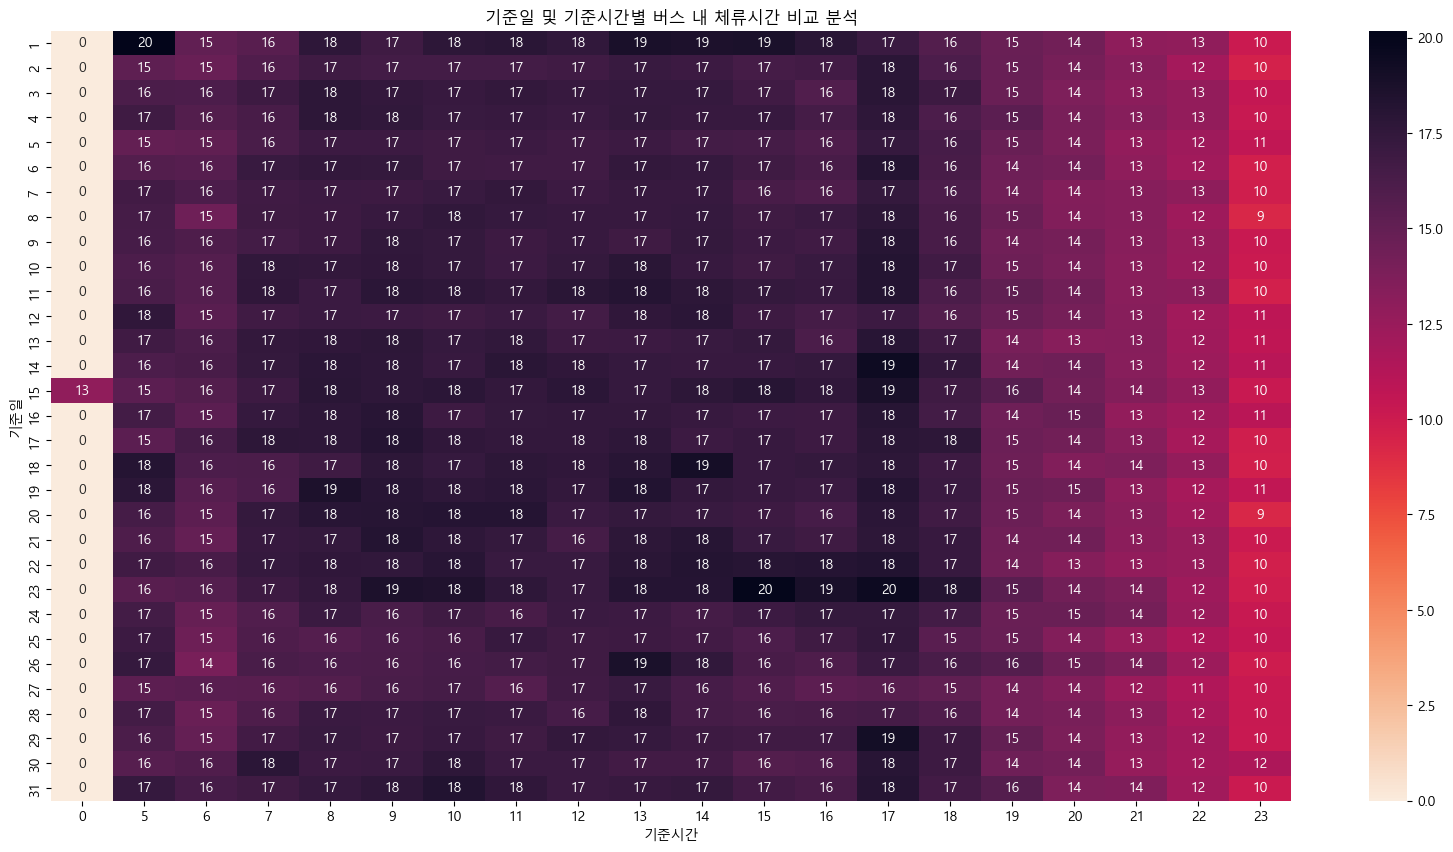

In [17]:
### 히트맵 그래프로 시각화 하기
# - 히트맵 : 데이터 3개가 필요함.. 보통 피봇테이블로 데이터 집계 후 사용하면 편함

# 그래프 사이즈 정의하기(너비, 높이)
plt.figure(figsize=(20, 10))

# 그래프 대제목 넣기
plt.title("기준일 및 기준시간별 버스 내 체류시간 비교 분석")

# 히트맵 그리기 : seaborn 라이브러리에 있습니다.
# - annot : 박스 안에 숫자 보여줄지(True)/말지(False) 정의
# - fmt : 박수 안에 숫자의 길이 정의(소숫점이 있는경우 자릿수 지정)
# - cmap : 색상맵(색상지도), 즉 어떤 색상 그룹을 사용할지 지정
#          (인터넷 상에 매우 많은 색상맵이 존재함)
sns.heatmap(df_pivot, annot=True, fmt=".0f", cmap="rocket_r")

# 그래프 보여주기(그래프 실행)
plt.show()

### 시간대별 승객연령별 버스내 체류시간(분) 분석